In [4]:
import sys
sys.path.append('src')
#
import os
import numpy as np
from scipy import special as sp
import pickle
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
import vsh
from mie import em, sigma_ext, sigma_sca
import pickle

In [5]:
vsh.__VERSION__

1.0

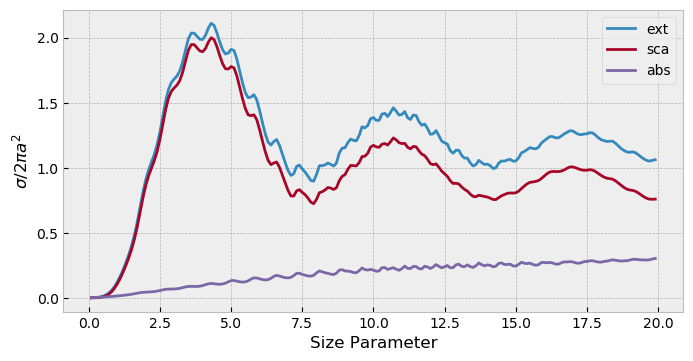

In [6]:
k0=2*np.pi
nrat=1.5 + 1j*0.01
R = np.arange(0.1, 20, 0.1)/k0

maxL = 30
sext = np.asarray([sigma_ext(maxL,nrat,k0, radius) for radius in R])/(2*np.pi*R**2)
ssca = np.asarray([sigma_sca(maxL,nrat,k0, radius) for radius in R])/(2*np.pi*R**2)

with plt.style.context('bmh'):
    fig,ax=plt.subplots(dpi=100,figsize=(8,4))
    ax.plot(k0*R,sext,label='ext')
    ax.plot(k0*R,ssca,label='sca')
    ax.plot(k0*R,sext-ssca,label='abs')
    ax.set_xlabel('Size Parameter')
    ax.set_ylabel('$\sigma/2\pi a^2$')
    ax.legend()
#

In [7]:
from matplotlib.animation import FuncAnimation
def makeplot(E,x,y,z):
    fig,axs=plt.subplots(figsize=(10,5),dpi=100,ncols=3,nrows=2)
    for i in range(3):
        ax=axs[0]
        im=ax[i].pcolor(x,z,E[i].real,cmap='jet')
        fig.colorbar(im, ax=ax[i],orientation='vertical')
        ax[i].set_aspect('equal')
        #
        ax=axs[1]
        im=ax[i].pcolor(x,z,E[i].imag,cmap='jet')
        fig.colorbar(im, ax=ax[i],orientation='vertical')
        ax[i].set_aspect('equal')
    #
    fig.tight_layout()
#
def oneplot(ax,f,x,z,cmap='RdBu_r',vmin=None,vmax=None):
    p = ax.pcolor(x,z,f,cmap=cmap,vmin=vmin,vmax=vmax)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return p